In [1]:
'''
Author: invokred
Filename: basicAnalysis.py
Discription: Make inferences on trip duration and pickup times based on data.
'''

#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def clean(data):
    #removing anomalies     
    #took help of COUNTIF in MS Excel to find time based anomalies
        #(the trips where time < 1 min [count = 6177] min && time > 2 hours [count = 1625]) 
    time_anomalies = ((data.trip_duration < 60) | (data.trip_duration > 3600 * 2))
    print('Time based anomalies are {:.2f} %.'.format(data[time_anomalies].shape[0] / data.shape[0] * 100))
    data = data[~time_anomalies]
    print('Range of trip duration is {} to {}.'.format(data.trip_duration.min(), data.trip_duration.max()))
    
    #removing trips with 0 passengers, like yea of what actual use are they :P
    print('Passenger anomalies from time anomaly cleaned data are equal to {}.'.format(data[data.passenger_count == 0].shape[0]))
    data = data[data.passenger_count > 0]
    
    #converting to proper data types
        #convert trip_duration to integer 
    data.trip_duration = data.trip_duration.astype(np.uint16)
        #convert store_and_fwd_flag to category as the values are a limited no. of single string characters
    data.store_and_fwd_flag = data.store_and_fwd_flag.astype('category')
    
    #converting to proper date time format
        #ordering by month
    data['mm_pickup'] = data.pickup_datetime.dt.month.astype(np.uint8)
    data['mm_dropoff'] = data.dropoff_datetime.dt.month.astype(np.uint8)
    
        #ordering by day of week
    data['dow_pickup'] = data.pickup_datetime.dt.weekday.astype(np.uint8)
    data['dow_dropoff'] = data.dropoff_datetime.dt.weekday.astype(np.uint8)
    
        #ordering by hour
    data['hh_pickup'] = data.pickup_datetime.dt.hour.astype(np.uint8)
    data['hh_dropoff'] = data.dropoff_datetime.dt.hour.astype(np.uint8)    

    return data

In [3]:
def PickupPlot1(data):
    '''
    Pickups distribution by hour of day
    '''
    plt.figure(figsize = (12, 2))
    
    data = data.groupby('hh_pickup').aggregate({'id':'count'}).reset_index()    
    sns.barplot(x = 'hh_pickup', y = 'id', data = data)
    
    plt.title('Pickups v/s Hour Distribution')
    plt.xlabel('Hour (24 hour clock)')
    plt.ylabel('Number of pickups')
    
    plt.savefig('Figures/pickups-hour-distribution.png')

In [4]:
def PickupPlot2(data, dayOfWeek):
    '''
    Pickups distribution by day of week
    '''
    plt.figure(figsize = (12, 2))
    
    data = data.groupby('dow_pickup').aggregate({'id':'count'}).reset_index()
    sns.barplot(x = dayOfWeek, y = 'id', data = data)
    
    plt.title('Pickups v/s Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Number of pickups')
    
    plt.savefig('Figures/pickups-dow-distribution.png')

In [5]:
def PickupPlot3(data, dayOfWeek):
    '''
    Pickups heatmap w.r.t. day of week and hour of day
    '''
    plt.figure(figsize = (12, 2))
    
    sns.heatmap(data = pd.crosstab(index = data.dow_pickup, columns = data.hh_pickup, values = data.vendor_id, aggfunc = 'count', normalize = 'index'))
    
    plt.title('Heatmap of pickups between Day of Week v/s Hour of Day')
    plt.xlabel('Hour of Week')
    plt.ylabel('Day of Week')
    plt.yticks(range(0, 7), dayOfWeek[::-1], rotation = 'horizontal')
    
    plt.savefig('Figures/heatmap-pickups.png')

In [6]:
def TimePlot1(data):
    '''
    Number of trips v/s trip duration
    '''
    plt.figure(figsize = (12, 3))

    plt.title('Number of trips v/s Trip duration')
    plt.xlabel('Trip duration (in min)')
    plt.ylabel('Number of trips')
    plt.hist(x = data.trip_duration / 60, bins = 100)
    
    plt.savefig('Figures/trips-time-distribution.png')

In [7]:
def TimePlot2(data, dayOfWeek):
    '''
    Heatmap of trip duration w.r.t day of week and hour of day
    '''
    plt.figure(figsize = (12, 2))
    
    sns.heatmap(data = pd.crosstab(index = data.dow_pickup, columns = data.hh_pickup, values = data.trip_duration / 60, aggfunc = 'mean'))
    
    plt.title('Heatmap of Trip Duration between Day of Week v/s Hour of Day')
    plt.xlabel('Hour of Week')
    plt.ylabel('Day of Week') 
    plt.yticks(range(0, 7), dayOfWeek[::-1], rotation = 'horizontal')
    
    plt.savefig('Figures/heatmap-time.png')

In [8]:
#read data
trainDB = pd.read_csv(filepath_or_buffer = 'train.csv', delimiter = ',', engine = 'c', low_memory = True, infer_datetime_format = True, parse_dates=[2,3])    

In [9]:
#clean data
trainDB = clean(trainDB) 

#adding additional column of Day of Week to speed up calculations for plot mapping
dayOfWeek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Time based anomalies are 0.74 %.
Range of trip duration is 60 to 7191.
Passenger anomalies from time anomaly cleaned data are equal to 17.


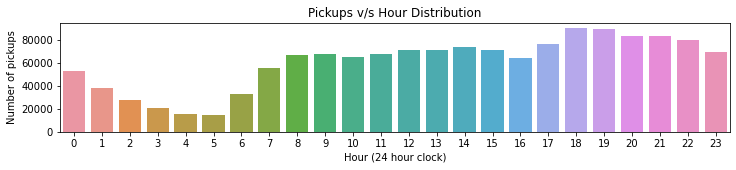

In [10]:
#Visualization for Pickup feature
PickupPlot1(trainDB) 

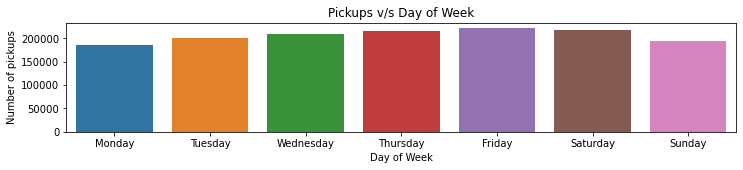

In [11]:
PickupPlot2(trainDB, dayOfWeek)

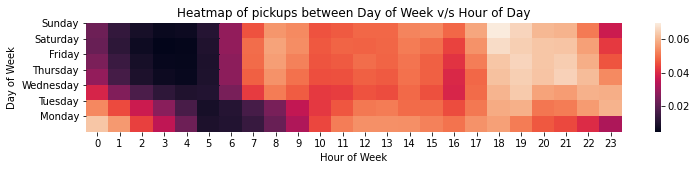

In [12]:
PickupPlot3(trainDB, dayOfWeek)

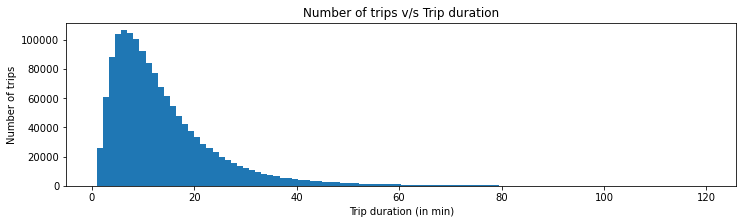

In [13]:
#Visualization for Trip Duration
TimePlot1(trainDB)

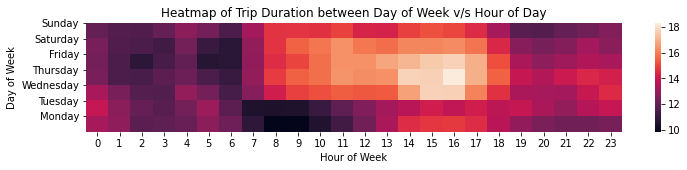

In [14]:
TimePlot2(trainDB, dayOfWeek)